In [1]:
# importing required packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# reading dataset from csv file and storing in df variable
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# checking the number of records in the dataset
df.shape

(39717, 111)

In [4]:
# Settings the number of rows to display in output to few all column data
# got below code from "https://stackoverflow.com/questions/58298963/jupyter-not-showing-whole-output" url
pd.set_option('display.max_rows', 200)

In [5]:
# checking the datatypes of the columns in the dataset
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Datatype Conversions

_Converting the columns data with relevant data type {e.g. converting string date to date format}_

In [6]:
# ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer
# So, converting id column to String type
df.id = df.id.astype(str)
df.id.describe()

count      39717
unique     39717
top       739612
freq           1
Name: id, dtype: object

In [7]:
# Member ID of the customer is not a numeric value to perform some operation, but a unique value to identify the customer membership
# So, converting member id column to String type

df.member_id = df.member_id.astype(str)
df.member_id.describe()

count      39717
unique     39717
top       980158
freq           1
Name: member_id, dtype: object

In [8]:
# Term in the dataset is available as object, where term is a interger value of number of months the loan period
# replacing the "months" with empty string and converting it to int
df.term = df.term.apply(lambda x: int(x.replace('months', '').strip()))
df.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

In [76]:
# Interest Rate on the loan is a numeric value and only contains percentage symbol in addition with the interest rate
# by removing "%" from the interest rate column, we can convert it into numberic column [float type]
df.int_rate = df.int_rate.apply(lambda x: float(x.replace('%', '').strip()))
df.int_rate.describe()

count    37825.000000
mean        12.070531
std          3.734364
min          5.420000
25%          9.320000
50%         11.860000
75%         14.610000
max         24.590000
Name: int_rate, dtype: float64

In [10]:
# converting issue_d i.e. The month which the loan was funded column type to date format
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')
df.issue_d.describe()

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object

In [11]:
# converting earliest_cr_line i.e. The month the borrower's earliest reported credit line was opened column type to date format
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.earliest_cr_line.describe()

count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

In [12]:
#  converting revol_util i.e. Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit  column to float type by removing "%"
df.revol_util = df.revol_util.apply(lambda x: float(str(x).replace('%', '').strip()))
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [13]:
# converting last_pymnt_d column to date type column
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y')
df.last_pymnt_d.describe()

count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [14]:
# converting next_pymnt_d column to date type column
df.next_pymnt_d = pd.to_datetime(df.next_pymnt_d, format='%b-%y')
df.next_pymnt_d.describe()

count                    1140
unique                      2
top       2016-06-01 00:00:00
freq                     1125
first     2016-06-01 00:00:00
last      2016-07-01 00:00:00
Name: next_pymnt_d, dtype: object

In [15]:
# converting last_credit_pull_d column to date type column
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y')
df.last_credit_pull_d.describe()

count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object

# Data cleaning
_fixing the issues in the column data_

In [16]:
# As per Data Dictionary, id of a customer should be unique
df.id.is_unique

True

In [17]:
# As per Data Dictionary, member id of a customer should be unique
# checking member id column is unique by checking number of records [count] and unique values [unique] are same/equal
df.member_id.is_unique

True

In [18]:
# checking that funded amount should be less than or equals to applied loan amount, by using the opposite condition output rows are zero
df[df.funded_amnt > df.loan_amnt].shape

(0, 111)

In [19]:
# checking that funded amount should be greater than or equals to funded amount by investor, and this is being tested by using the opposite condition where output rows should be zero
df[df.funded_amnt<df.funded_amnt_inv].shape

(0, 111)

In [20]:
# Term of the loan should be either 36 months or 60 months
# So, checking the unique values in the term column by grouping the same

df.term.groupby(by=df.term).describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,29096.0,36.0,0.0,36.0,36.0,36.0,36.0,36.0
60,10621.0,60.0,0.0,60.0,60.0,60.0,60.0,60.0


In [21]:
df.int_rate.groupby(by=[df.grade, df.sub_grade, df.term]).describe()

count unique     top freq
grade sub_grade term                          
A     A1        36    1139      6   5.42%  573
      A2        36    1494      7   5.79%  400
                60      14      2   5.79%   10
      A3        36    1769      9   6.99%  336
                60      41      2   6.17%   31
      A4        36    2753     12   7.49%  641
                60     133      5   6.54%   43
      A5        36    2495     10   7.88%  641
                60     247      5   7.88%   84
B     B1        36    1619     15   9.91%  329
                60     211      5  10.38%   55
      B2        36    1724     15  10.65%  328
                60     333      5  10.65%  107
      B3        36    2195     15  10.99%  525
                60     722      6  10.99%  194
      B4        36    1819     13  11.49%  492
                60     693      6  11.49%  333
      B5        36    1974     15  12.69%  334
                60     730      7  11.99%  204
C     C1        36    1470     13  13.49%  256
                60     666      7  12.99%  187
      C2        36    1341     14  14.27%  232
                60     670      7  13.49%  203
      C3        36    1092     14  13.98%  152
                60     437      6  13.98%  132
      C4        36     954     15  13.85%  130
                60     282      4  14.79%   93
      C5        36     892     15  15.23%  125
                60     294      5  15.23%   90
D     D1        36     918     15  15.62%  162
                60      13      5  15.62%    5
      D2        36     816     13  14.96%  202
                60     532      8  15.99%  151
      D3        36     637     14  16.49%  105
                60     536      6  17.27%  138
      D4        36     494     13  15.65%  110
                60     487      7  16.89%  132
      D5        36     366     14  16.00%   58
                60     508      8  17.49%  141
E     E1        36     286     12  16.45%   70
                60     477      6  17.99%  118
      E2        36     211     12  16.82%   41
                60     445      6  18.39%  126
      E3        36     164     12  17.19%   32
                60     389      7  19.42%   98
      E4        36     108     14  17.56%   26
                60     346      6  19.29%   94
      E5        36      99     14  17.93%   30
                60     317      7  19.69%   96
F     F1        36      62     10  18.30%   14
                60     267      6  20.25%   74
      F2        36      54     11  18.43%   13
                60     195      6  20.62%   53
      F3        36      31     10  19.04%   10
                60     154      5  20.99%   48
      F4        36      38     10  19.41%   11
                60     130      6  21.36%   41
      F5        36      26      8  19.47%    7
                60      92      6  21.74%   27
G     G1        36      20      7  19.82%    5
                60      84      5  22.11%   28
      G2        36      13      6  20.03%    4
                60      65      5  20.48%   21
      G3        36       4      4  20.52%    1
                60      44      5  20.85%   15
      G4        36       9      5  21.27%    3
                60      47      6  23.91%   11
      G5        36      10      6  21.21%    4
                60      20      6  21.59%    7

In [22]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
# Home ownership should be Mortage, Own, Rent and Other
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [24]:
# In home ownership column we have None for home ownership, which shouldn't be there
# As there is no specific factor to determine the home ownership
pd.set_option('display.max_columns', 200)
df[df.home_ownership=='NONE']

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39318,231321,214993,10000,10000,1228.06,36,7.75%,312.22,A,A3,ups,5 years,NONE,22200.0,Not Verified,2008-01-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,"I plan to pay off my credit cards, leaving me ...",debt_consolidation,Melinda Holster,233xx,VA,5.24,0,1994-04-01,0,0.0,0.0,9,0,4767,8.7,22,f,0.0,0.0,11239.620890,1380.00,9999.99,1239.63,0.0,0.0,0.0,2011-02-01,313.59,NaT,2011-01-01,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
39659,121568,121574,4000,4000,1925.00,36,9.64%,128.41,B,B4,NaN,< 1 year,NONE,100000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I took a high interest loan from Citibank in 2...,other,Refinancing high interest loan,950xx,CA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,4622.489229,2224.58,4000.00,622.49,0.0,0.0,0.0,2010-09-01,129.76,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39660,121535,121373,2800,2800,1625.00,36,8.70%,88.65,B,B1,NaN,< 1 year,NONE,120000.0,Not Verified,2007-08-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The family is expanding in October and we are ...,other,Baby is coming,024xx,MA,15.00,0,1999-05-01,1,NaN,NaN,6,0,8155,14.9,8,f,0.0,0.0,3191.218575,1852.05,2800.00,391.22,0.0,0.0,0.0,2010-09-01,89.80,NaT,2007-08-01,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# So, choosing OTHER as home ownership is wise in this situation
df.home_ownership = df.home_ownership.apply(lambda x: "OTHER" if x == "NONE" else x)

# again checking the home ownership column 
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER         101
Name: home_ownership, dtype: int64

In [26]:
df.verification_status.value_counts(dropna=False)

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64

In [27]:
df.loan_status.value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

# Data Cleaning & Handling missing values

### Removing empty columns

In [28]:
# checking number of empty cells in a column
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [29]:
# There are total of 39717 records in the dataset
# if we abserved above data which consist of number of null values in a column
# we can see that some of the columns are completely empty, which are not usable for analysis, so dropping the column
df = df.dropna(axis=1, how='all')
df.shape

(39717, 57)

In [30]:
# dropping columns with huge missing records
df = df.drop(axis=1, columns=['next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'])
df.shape

(39717, 54)

### Checking single value column in the dataset which are not usable in Analysis

In [31]:
df.pymnt_plan.value_counts(dropna=False)

n    39717
Name: pymnt_plan, dtype: int64

In [32]:
df.initial_list_status.value_counts(dropna=False)

f    39717
Name: initial_list_status, dtype: int64

In [33]:
df.collections_12_mths_ex_med.value_counts(dropna=False)


0.0    39661
NaN       56
Name: collections_12_mths_ex_med, dtype: int64

In [34]:
df.policy_code.value_counts(dropna=False)

1    39717
Name: policy_code, dtype: int64

In [35]:
df.acc_now_delinq.value_counts(dropna=False)

0    39717
Name: acc_now_delinq, dtype: int64

In [36]:
df.chargeoff_within_12_mths.value_counts(dropna=False)

0.0    39661
NaN       56
Name: chargeoff_within_12_mths, dtype: int64

In [37]:
df.delinq_amnt.value_counts(dropna=False)

0    39717
Name: delinq_amnt, dtype: int64

In [38]:
df.tax_liens.value_counts(dropna=False)

0.0    39678
NaN       39
Name: tax_liens, dtype: int64

In [39]:
df.application_type.value_counts(dropna=False)

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [40]:
df = df.drop(axis=1, columns=['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 
                              'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'application_type'])
df.shape

(39717, 45)

In [41]:
df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12940
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [42]:
df.emp_title.describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [43]:
# Filling missing emp_title as Others
df.emp_title = df.emp_title.fillna("Others")
df.emp_title.isnull().sum()

0

In [44]:
df.emp_length.value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

In [45]:
df.desc.isnull().sum()

12940

In [46]:
df.desc = df.desc.fillna("Others")
df.desc.isnull().sum()

0

In [47]:
df = df[~df.title.isnull()]

In [48]:
# Number of public record bankruptcies field is an affective field for analysis
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37328
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [49]:
# Only 697 missing record, so dropping the empty records
df = df[~df.pub_rec_bankruptcies.isnull()]
df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    37328
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [50]:
df.revol_util.isnull().sum()

50

In [51]:
df = df[~df.revol_util.isnull()]
df.revol_util.isnull().sum()

0

In [52]:
df.shape

(38959, 45)

In [53]:
df.last_pymnt_d.describe()

count                   38892
unique                     97
top       2016-05-01 00:00:00
freq                     1256
first     2008-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object

In [54]:
df = df[~(df.last_pymnt_d.isnull() | df.last_credit_pull_d.isnull())]
df.shape

(38891, 45)

In [55]:
df = df[~df.emp_length.isnull()]
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                       0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt   

# Analysis

## Univariate Analysis

## Bivariate Analysis

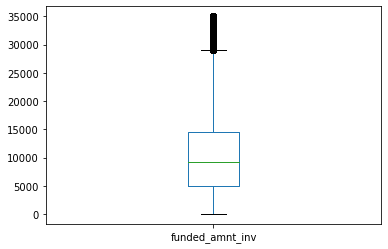

In [68]:
df.funded_amnt_inv.plot.box()
plt.show()

In [72]:
df[df.funded_amnt_inv>30000].loan_status.value_counts()

Fully Paid     433
Charged Off    129
Current         70
Name: loan_status, dtype: int64

In [83]:
df[df.funded_amnt_inv<=30000].loan_status.value_counts()

Fully Paid     31092
Charged Off     5073
Current         1028
Name: loan_status, dtype: int64

In [74]:
df[df.funded_amnt>30000].loan_status.value_counts()

Fully Paid     460
Charged Off    142
Current         70
Name: loan_status, dtype: int64

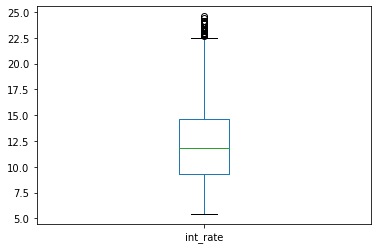

In [78]:
df.int_rate.plot.box()
plt.show()

In [80]:
df[df.int_rate>22.5].loan_status.value_counts()

Fully Paid     35
Charged Off    30
Current        13
Name: loan_status, dtype: int64

In [82]:
df[df.int_rate<22.5].loan_status.value_counts()

Fully Paid     31490
Charged Off     5172
Current         1085
Name: loan_status, dtype: int64

In [90]:
df.pivot_table(columns=['sub_grade'], index='loan_status', aggfunc=np.sum)

annual_inc                                           \
sub_grade             A1           A2            A3            A4   
loan_status                                                         
Charged Off   1237924.00   3034751.80  5.010857e+06  9.265788e+06   
Current              NaN          NaN           NaN  5.982040e+05   
Fully Paid   70176412.97  90901508.23  1.095393e+08  1.750843e+08   

                                                                     \
sub_grade              A5            B1            B2            B3   
loan_status                                                           
Charged Off  1.082075e+07  8.440639e+06  1.241350e+07  2.041563e+07   
Current      1.570088e+06  1.993629e+06  3.177402e+06  6.210748e+06   
Fully Paid   1.671412e+08  1.004065e+08  1.159625e+08  1.725204e+08   

                                                                     \
sub_grade              B4            B5            C1            C2   
loan_status                                                           
Charged Off  1.860628e+07  1.875009e+07  1.925047e+07  1.659379e+07   
Current      5.855569e+06  6.220178e+06  5.427224e+06  6.690233e+06   
Fully Paid   1.414760e+08  1.500330e+08  1.193766e+08  1.096075e+08   

                                                                              \
sub_grade             C3           C4           C5           D1           D2   
loan_status                                                                    
Charged Off  14757913.38  12024867.79  11038028.04   9265138.12  14982701.20   
Current       2674510.24   2067444.00   2338436.00          NaN   4437340.00   
Fully Paid   81308280.10  63584879.41  61022384.91  48500386.09  70201442.91   

                                                                              \
sub_grade             D3           D4           D5           E1           E2   
loan_status                                                                    
Charged Off  16156526.50  11987594.60  13375593.32  13166378.83  11090862.48   
Current       4104492.90   3738592.00   3889553.80   2832731.20   3207004.10   
Fully Paid   56175542.03  49989366.01  43727952.13  38371391.76  33485475.97   

                                                                              \
sub_grade             E3           E4           E5           F1           F2   
loan_status                                                                    
Charged Off   8267175.72   8654693.08   9119272.25   7132326.78   5144402.36   
Current       2609077.42   3183119.00   2410290.00   2303652.00   1684627.00   
Fully Paid   30394395.66  22586957.00  25697228.48  17405713.18  12979335.40   

                                                                          \
sub_grade             F3          F4          F5          G1          G2   
loan_status                                                                
Charged Off   3665208.57  4445172.40  4027273.28  1950356.00  2231288.00   
Current        915328.76  1481750.00   724000.00   912404.00    90000.00   
Fully Paid   11003340.16  7006000.84  5918196.58  6081682.96  4529545.96   

                                              collection_recovery_fee  \
sub_grade           G3          G4         G5                      A1   
loan_status                                                             
Charged Off  1341231.0  1268155.63   937900.0               1570.3314   
Current       181000.0   255000.00   200000.0                     NaN   
Fully Paid   2754658.0  4632743.96  2043288.0                  0.0000   

                                                                               \
sub_grade          A2         A3         A4          A5         B1         B2   
loan_status                                                                     
Charged Off  862.3135  6905.1293  3883.4831  15126.4104  5598.1308  8381.4162   
Current           NaN        NaN     0.0000      0.0000     0.0000     0.0000   
F